# CSE447/517: Assignment 0, PyTorch/ML review (Winter '24)

Author: Yegor Kuznetsov

Thanks to Skyler Hallinan and Melanie Sclar for feedback!

Some PyTorch content adapted from Stanford's CS224N PyTorch Tutorial.<br>
Specifically, part 1 and the autograd introduction in part 3 were adapted from Stanford's CS224N PyTorch Tutorial.

In this notebook we will have a basic introduction to `PyTorch` and review some machine learning content.<br>
The following resources have been used in preparation of this notebook:
* [Stanford's CS224N PyTorch Tutorial](https://colab.research.google.com/drive/13HGy3-uIIy1KD_WFhG4nVrxJC-3nUUkP?usp=sharing)
* Official PyTorch Documentation on [Deep Learning with PyTorch: A 60 Minute Blitz](https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html)

If this is your first time using PyTorch we recommend going through the full [Stanford CS224N PyTorch Tutorial](https://colab.research.google.com/drive/13HGy3-uIIy1KD_WFhG4nVrxJC-3nUUkP?usp=sharing), <br> as the PyTorch content in this notebook is significantly condensed.

## Introduction

[PyTorch](https://pytorch.org/) is a deep learning framework, one of the two main frameworks alongside [TensorFlow](https://www.tensorflow.org/).<br>
Let's start by importing PyTorch:

In [1]:
import torch
import torch.nn as nn
from torch.nn.functional import mse_loss

We are all set to start our tutorial. Let's dive in!

## Part 1: Tensors

This part is adapted from Stanford's CS224N PyTorch Tutorial

**Tensors** are PyTorch's most basic building block. Each tensor is a multi-dimensional matrix; <br>
for example, a 256x256 square image might be represented by a `3x256x256` tensor, where the first dimension represents color.<br>
Here's how to create a tensor from a python list:

In [2]:
list_of_lists = [
  [1, 2, 3],
  [4, 5, 6],
]

# This is just a normal python list
print(list_of_lists)

[[1, 2, 3], [4, 5, 6]]


In [3]:
# And now we make a PyTorch tensor with the same data
data = torch.tensor(list_of_lists)
print(data)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [4]:
# We can, of course, create the tensor directly from a list (of lists)
data = torch.tensor([
  [0, 1],
  [2, 3],
  [4, 5],
])
print(data)

tensor([[0, 1],
        [2, 3],
        [4, 5]])


In [5]:
# ValueError: tensors cannot have different lengths at different indices
torch.tensor([
  [0, 1],
  [2, 3, 4],
])

ValueError: expected sequence of length 2 at dim 1 (got 3)

Each tensor has a **data type**: the major data types you'll need to worry about are floats (`torch.float32`) and integers (`torch.int`).<br>
You can specify the data type explicitly when you create the tensor, or it can be determined implicitly based on the provided data.

In [6]:
# Initializing a tensor with an explicit data type
# Notice the dots after the numbers in the output, which specify that they're floats
data = torch.tensor([
  [0, 1],
  [2, 3],
  [4, 5],
], dtype=torch.float32)
print(data)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])


In [7]:
# Initializing a tensor with an implicit data type
# Notice the dots after the numbers, which specify that they're floats
data = torch.tensor([
  [0.11111111, 1],
  [2, 3],
  [4, 5],
])
print(data, data.dtype)

tensor([[0.1111, 1.0000],
        [2.0000, 3.0000],
        [4.0000, 5.0000]]) torch.float32


In [8]:
# Contrast that to this version, which contains only ints
data = torch.tensor([
  [0, 1],
  [2, 3],
  [4, 5],
])
print(data, data.dtype)

tensor([[0, 1],
        [2, 3],
        [4, 5]]) torch.int64


From here on out, for brevity, we frequently use the behavior of a Jupyter Notebook display the value of the last line of a cell.

Note that tensors are more flexible than just matrices, being able to have any number of dimensions.

Utility functions also exist to create tensors with given shapes and contents:

In [9]:
torch.zeros(2, 5) # a tensor of all zeros

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

In [10]:
torch.ones(3, 4)  # a tensor of all ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

In [11]:
torch.rand(3, 3)   # a tensor with random numbers within (0, 1)

tensor([[0.1471, 0.6082, 0.1735],
        [0.0248, 0.1658, 0.5753],
        [0.6036, 0.0877, 0.2879]])

In [12]:
rr = torch.arange(1, 10)  # range from [1, 10)
print(rr)

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9])


Mathematical operations can be used with tensors fairly flexibly.<br>
Operations involving a tensor and a number are easy to reason with, while operations involving tensors require them to have compatible shapes.

In [13]:
print(rr + 2)
print(rr * 2)
print(rr ** 2)
print(rr % 3)

tensor([ 3,  4,  5,  6,  7,  8,  9, 10, 11])
tensor([ 2,  4,  6,  8, 10, 12, 14, 16, 18])
tensor([ 1,  4,  9, 16, 25, 36, 49, 64, 81])
tensor([1, 2, 0, 1, 2, 0, 1, 2, 0])


In [14]:
a = torch.tensor([[1, 2], [2, 3], [4, 5]])      # (3, 2)
b = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])  # (2, 4)

print("A is", a)
print("B is", b)

# a.matmul(b) and a@b do the same thing -- matrix multiply
print("a.matmul(b) is", a.matmul(b))
print("a @ b is", a @ b)

A is tensor([[1, 2],
        [2, 3],
        [4, 5]])
B is tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
a.matmul(b) is tensor([[11, 14, 17, 20],
        [17, 22, 27, 32],
        [29, 38, 47, 56]])
a @ b is tensor([[11, 14, 17, 20],
        [17, 22, 27, 32],
        [29, 38, 47, 56]])


The **shape** of a tensor (which can be accessed by `.shape`) is defined as the dimensions of the tensor. Here's some examples:

In [15]:
matr_2d = torch.tensor([[1, 2, 3], [4, 5, 6]])
print(matr_2d)
print(matr_2d.shape)

tensor([[1, 2, 3],
        [4, 5, 6]])
torch.Size([2, 3])


In [16]:
matr_3d = torch.tensor([[[1, 2, 3, 4], [-2, 5, 6, 9]], [[5, 6, 7, 2], [8, 9, 10, 4]], [[-3, 2, 2, 1], [4, 6, 5, 9]]])
print(matr_3d)
print(matr_3d.shape)

tensor([[[ 1,  2,  3,  4],
         [-2,  5,  6,  9]],

        [[ 5,  6,  7,  2],
         [ 8,  9, 10,  4]],

        [[-3,  2,  2,  1],
         [ 4,  6,  5,  9]]])
torch.Size([3, 2, 4])


**Reshaping** tensors can be used to make batch operations easier (more on that later), but be careful that the data is reshaped in the order you expect:

In [17]:
rr = torch.arange(1, 16)
print(rr)
print(rr.shape)

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15])
torch.Size([15])


In [18]:
rr = rr.view(5, 3)
print(rr)
print(rr.shape)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12],
        [13, 14, 15]])
torch.Size([5, 3])


Finally, you can also inter-convert tensors with **NumPy arrays**:

In [19]:
import numpy as np

# numpy.ndarray --> torch.Tensor:
arr = np.array([[1, 0, 5]])
data = torch.tensor(arr)
print("This is a", type(data), data)

# torch.Tensor --> numpy.ndarray:
new_arr = data.numpy()
print("This is a", type(new_arr), new_arr)

This is a <class 'torch.Tensor'> tensor([[1, 0, 5]], dtype=torch.int32)
This is a <class 'numpy.ndarray'> [[1 0 5]]


One of the reasons why we use **tensors** is *vectorized operations*: operations that be conducted in parallel over a particular dimension of a tensor.

In [20]:
data = torch.arange(1, 36, dtype=torch.float32).reshape(5, 7)
print("Data is:", data)

# We can perform operations like *sum* over each row...
print("Taking the sum over columns:")
print(data.sum(dim=0))

# or over each column.
print("Taking thep sum over rows:")
print(data.sum(dim=1))

# Other operations are available:
print("Taking the stdev over rows:")
print(data.std(dim=1))

Data is: tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11., 12., 13., 14.],
        [15., 16., 17., 18., 19., 20., 21.],
        [22., 23., 24., 25., 26., 27., 28.],
        [29., 30., 31., 32., 33., 34., 35.]])
Taking the sum over columns:
tensor([ 75.,  80.,  85.,  90.,  95., 100., 105.])
Taking thep sum over rows:
tensor([ 28.,  77., 126., 175., 224.])
Taking the stdev over rows:
tensor([2.1602, 2.1602, 2.1602, 2.1602, 2.1602])


In [21]:
data.sum()

tensor(630.)

**Indexing**

You can access arbitrary elements of a tensor using the `[]` operator.

In [22]:
x = torch.Tensor([
  [[1, 2], [3, 4]],
  [[5, 6], [7, 8]],
  [[9, 10], [11, 12]]
])
print(x)
print(x.shape)

tensor([[[ 1.,  2.],
         [ 3.,  4.]],

        [[ 5.,  6.],
         [ 7.,  8.]],

        [[ 9., 10.],
         [11., 12.]]])
torch.Size([3, 2, 2])


In [23]:
# Access the 0th element, which is the first row
x[0]  # Equivalent to x[0, :, :]

tensor([[1., 2.],
        [3., 4.]])

In [24]:
x[:, 0]

tensor([[ 1.,  2.],
        [ 5.,  6.],
        [ 9., 10.]])

In [25]:
x[1, :, 0]

tensor([5., 7.])

**builtin functions**

PyTorch contains many pre-defined functions for tensor operations beyond simple numerical ones.<br>
Most functions which operate on a single tensor also have an analogous verison when called from the tensor.

See PyTorch's [tensor class reference](https://pytorch.org/docs/stable/tensors.html#tensor-class-reference) for a more,
but the examples below are the ones relevant to this assignment.

In [26]:
# construct an example tensor
x = torch.tensor([-1.5330,  0.4530, -0.7361, -0.3403,  2.4078])
x

tensor([-1.5330,  0.4530, -0.7361, -0.3403,  2.4078])

The `sigmoid` activation function, typically represented by the symbol $\sigma$, is defined as:
$$ \sigma(x) = \frac{1}{1 + e^{-x}} $$

When applied to a tensor, the function is applied per-element to produce a new tensor with the same shape.

In [27]:
# sigmoid is pre-defined for you within PyTorch and can be applied to any tensor
torch.sigmoid(x)

tensor([0.1776, 0.6114, 0.3239, 0.4157, 0.9174])

In [28]:
# sigmoid can also be called using this alternate notation
x.sigmoid()

tensor([0.1776, 0.6114, 0.3239, 0.4157, 0.9174])

The `relu` activation function is defined as:
$$ \text{ReLU}(x) = \max(0, x) $$

Like `sigmoid`, it is applied to tensor's per-element

In [29]:
# positive values remain, while negative values become zero
torch.relu(x)

tensor([0.0000, 0.4530, 0.0000, 0.0000, 2.4078])

In [30]:
# relu can also be called using the alternate notation
x.relu()

tensor([0.0000, 0.4530, 0.0000, 0.0000, 2.4078])

## Part 2: Implementing a Neural Network By Hand

Now that you are an expert in PyTorch tensors, we can start creating and using a neural network. Consider this (tiny) neural network:

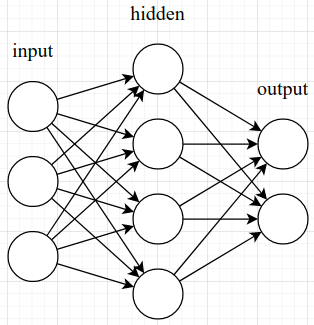

Recall that an artificial neural network is composed of layers of connections between nodes.<br>
Each node performs a weighted aggregation of outputs from the previous layer and applies a nonlinearity to produce its output.<br>
See [here](http://neuralnetworksanddeeplearning.com/chap1.html) for a refresher of neural networks terminology.

Our example network has 3 input nodes, a hidden layer with 4 nodes, and 2 output nodes.<br>
The network has two layers, one being the transformation from input to the hidden layer and the other the transformation from the hidden layer to output.<br>
We will use ReLU activation as the nonlinearity for the first layer and sigmoid as the nonlinearity for the second layer (See formalization in exercise 1).

We will work on a synthetic dataset `(X, Y)`, drawn from the distribution defined in the function ``generate_data``.<br>
Understanding the exact nature of this distribution is not necessary:<br>
you only need to know that it defines some deterministic function mapping from 3-dimensional vectors to 2-dimensional vectors.<br>
Notably, the output is binary (either 0, or 1), hence why we use sigmoid activation for the last layer (output).<br>
Note that this is not a classification task; there's simply two output features, both of which can be either 0 or 1.

In [31]:
def generate_data(N) :
  X = torch.randn(N, 3)
  Y = (torch.stack([(X[:, 0] + X[:, 1]) * (X[:, 2] > 0) + (X[:, 0] - X[:, 1]) * (X[:, 2] < 0),
                    X.norm(dim=1)]).t().abs() > 1.33).float()
  return X, Y

In [32]:
# fixed seed for reproducible results
torch.manual_seed(0)

X, Y = generate_data(20)

In [33]:
X

tensor([[-1.1258, -1.1524, -0.2506],
        [-0.4339,  0.8487,  0.6920],
        [-0.3160, -2.1152,  0.3223],
        [-1.2633,  0.3500,  0.3081],
        [ 0.1198,  1.2377,  1.1168],
        [-0.2473, -1.3527, -1.6959],
        [ 0.5667,  0.7935,  0.5988],
        [-1.5551, -0.3414,  1.8530],
        [ 0.7502, -0.5855, -0.1734],
        [ 0.1835,  1.3894,  1.5863],
        [ 0.9463, -0.8437, -0.6136],
        [ 0.0316, -0.4927,  0.2484],
        [ 0.4397,  0.1124,  0.6408],
        [ 0.4412, -0.1023,  0.7924],
        [-0.2897,  0.0525,  0.5943],
        [ 1.5419,  0.5073, -0.5910],
        [-0.5692,  0.9200,  1.1108],
        [ 1.2899, -1.4959, -0.1938],
        [ 0.4455,  1.3253, -1.6293],
        [-0.5497, -0.4798, -0.4997]])

In [34]:
Y

tensor([[0., 1.],
        [0., 0.],
        [1., 1.],
        [0., 1.],
        [1., 1.],
        [0., 1.],
        [1., 0.],
        [1., 1.],
        [1., 0.],
        [1., 1.],
        [1., 1.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 1.],
        [0., 1.],
        [1., 1.],
        [0., 1.],
        [0., 0.]])

In order to implement the weighted aggregation for each node, we can represent the weights of a layer as a matrix, and add a vector as the bias.<br>
Initially, these matrices are randomly initialized and subsequently optimized such that the network's performance improves.

Parameters for the above toy network are defined below. In this case, we have:
- a linear layer from 3 to 4 nodes (3 x 4 matrix)
- bias for the 4 hidden nodes (1 x 4 matrix)
- a linear layer from 4 to 2 nodes (4 x 2 matrix)
- bias for the 2 output nodes (1 x 2 matrix)

Take a moment to make sure it's clear why the parameters are defined as such.

In [35]:
# initialize random values for NN weights and biases

W1 = torch.randn(3, 4) * 0.2
B1 = torch.randn(1, 4) * 0.2
W2 = torch.randn(4, 2) * 0.2
B2 = torch.randn(1, 2) * 0.2

### Exercise 1

**Manually perform a forward pass on the toy neural network**

First, we calculate the pre-activation values $z_1$ for the hidden layer, using the input $x$ directly.<br>
The hidden node values $h$ are computed by applying the `relu` function, which is defined as an element-wise $\text{ReLU}(x) := \max(0,x)$.<br>
We use this to compute the pre-activation values $z_2$ of the output layer.<br>
The output node values are computed with the `sigmoid` activation function.

The following equations are the steps needed to calculate the forward pass for the neural network given some input $x$,<br>
with $\times$ representing matrix multiplication.

\begin{align*}
z_1 &= x \times W_1 + B_1 \\
h &= \text{relu}(z_1) \\
z_2 &= h \times W_2 + B_2 \\
\widehat{y} &= \sigma(z_2)
\end{align*}

Look near the end of the tensors tutorial for examples of how to use PyTorch's implementations of `relu` and `sigmoid`,<br>
as well as how to do matrix multiplication using `@`.

In [36]:
def forward(x) :
  # Input -> Hidden layer
  z1 = x @ W1 + B1
  h = torch.relu(z1)
  # Hidden -> Output layer
  z2 = h @ W2 + B2
  return torch.sigmoid(z2)

In [37]:
# The network's output should have the same shape as Y, but totally wrong values
y_hat = forward(X)
y_hat

tensor([[0.5900, 0.6397],
        [0.6077, 0.6478],
        [0.6165, 0.6393],
        [0.6050, 0.6484],
        [0.6133, 0.6459],
        [0.5693, 0.6405],
        [0.6051, 0.6452],
        [0.6458, 0.6463],
        [0.6025, 0.6453],
        [0.6236, 0.6454],
        [0.5940, 0.6452],
        [0.6130, 0.6469],
        [0.6151, 0.6455],
        [0.6219, 0.6453],
        [0.6153, 0.6475],
        [0.5856, 0.6438],
        [0.6178, 0.6478],
        [0.6134, 0.6439],
        [0.5864, 0.6476],
        [0.5897, 0.6459]])

Finally, we will use [mean squared error](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) (mse)
as the numerical representation of how poorly the neural network performed on the task -- i.e., the _loss function_.<br>
Mean squared error is defined as the mean squared L2 norm between the true labels $Y$ and the predicted labels $\widehat{y}$.<br>
i.e. $\sum_{i=1}^{|y|}(\widehat{y}_i - Y_i)^2$, or equivalently $\text{mean}(||\widehat{y} - Y||_2^2)$.<br>
Since the vector size $n$ is fixed, MSE is always proportional to taking the sum instead of mean:

$$
\text{L} = ||\widehat{y} - Y||_2^2
$$

We will be using this definition of $\text{L}$ for easier computation. In PyTorch, this implies using mean squared error with `reduction = 'sum'`.

In [38]:
# loss is a numerical representation of how "poorly" the NN did the task
loss = ((y_hat - Y) ** 2).sum()
loss

tensor(10.3925)

In [39]:
# there's also a built-in function to do this
mse_loss(y_hat, Y, reduction='sum')

tensor(10.3925)

### Exercise 2

**Convert the provided math into code that manually performs the backward pass on the toy neural network. Modify the next code cell for this.**

Reference exercise 1 for forward pass and loss calculation.

Note the derivatives of the activation functions:

\begin{align*}
\sigma'(x) &= \sigma(x) (1 - \sigma(x)) \\
\text{relu}'(x) &= H(x) = \begin{cases}
    1, & x \ge 0 \\
    0, & x < 0
\end{cases}
\end{align*}

`ReLU` isn't differentiable at $x = 0$, but we can hardcode a value for the $x=0$ derivative for practical purposes.

If we break it apart like shown below, we can easily compute gradients by repeatedly using the chain rule.

\begin{align*}
\frac{\partial\text{L}}{\partial\widehat{y}} &= 2 (\widehat{y} - Y)
\\
\frac{\partial\text{L}}{\partial z_2} &= \frac{\partial\text{L}}{\partial\widehat{y}} \cdot \frac{\partial\widehat{y}}{\partial z_2} = \frac{\partial\text{L}}{\partial\widehat{y}} \cdot \frac{\partial\sigma(z_2)}{\partial z_2} \\
&= \frac{\partial\text{L}}{\partial\widehat{y}} \cdot \sigma(z_2) (1 - \sigma(z_2)) \\
&= \frac{\partial\text{L}}{\partial\widehat{y}} \cdot \widehat{y} (1 - \widehat{y})
\\
\frac{\partial\text{L}}{\partial h}
&= \frac{\partial\text{L}}{\partial z_2}\frac{\partial z_2}{\partial h}
= \frac{\partial\text{L}}{\partial z_2} W_2
\\
\frac{\partial\text{L}}{\partial z_1}
&= \frac{\partial\text{L}}{\partial h} \frac{\partial h}{\partial z_1}
= \frac{\partial\text{L}}{\partial h} H(z_1) \\
\end{align*}

$H(z_1)$ is easiest computed with $\verb|(z1 >= 0).float()|$ in PyTorch, or something similar.

Computations for weight and bias gradients are provided.<br>
Bias gradients are just aggregated pre-activation node value gradients;<br>
Weight gradients are an outer product of the node outputs with pre-activation node value gradients, aggregated over the batch.

In [40]:
def backprop(x) :
  # TODO: forward pass
  z1 = x @ W1 + B1
  h = torch.relu(z1)
  z2 = h @ W2 + B2
  y_hat = torch.sigmoid(z2)

  # TODO: backward pass
  y_hat_grad = 2 * (y_hat - Y)
  z2_grad = y_hat_grad * y_hat * (1 - y_hat)
  h_grad = z2_grad @ W2.T
  z1_grad = h_grad * (z1 >= 0).float()

  # calculate parameter gradients
  B2_grad = z2_grad.sum(0)
  W2_grad = (h[:, :, None] * z2_grad[:, None, :]).sum(0)
  B1_grad = z1_grad.sum(0)
  W1_grad = (X[:, :, None] * z1_grad[:, None, :]).sum(0)

  # output tuple of gradients for all parameters
  return W1_grad, B1_grad, W2_grad, B2_grad

In [41]:
# take note of the loss we have before optimization
y_hat = forward(X)
loss = ((y_hat - Y) ** 2).sum()
loss

tensor(10.3925)

After implementing backprop, gradient descent is easy: just take small steps in the opposite direction.<br>
This corresponds to multiplying some small constant by the gradient and subtracting that from the parameters. In math form that looks like:

$$
w_{t+1} = w_t - \alpha \nabla f(w_t)
$$

This small constant is called the **learning rate**, for which the symbol $\alpha$ is usually used.

The next cell demonstrates a single step of gradient descent. Try running the cell repeatedly, and watch as the loss reduces with each step.

In [50]:
# perform one step of gradient descent
lr = 0.01

W1_grad, B1_grad, W2_grad, B2_grad = backprop(X)
W1 -= W1_grad * lr
B1 -= B1_grad * lr
W2 -= W2_grad * lr
B2 -= B2_grad * lr

# forward pass again, notice the change in loss
y_hat = forward(X)
loss = ((y_hat - Y) ** 2).sum()
loss

tensor(9.9760)

### Exercise 3
**Could loss ever increase when you run the above cell?**

Try running the above cell multiple times and notice how the loss keeps decreasing. However, is the loss guaranteed to not increase? Edit this cell to answer below and explain why.

Hint: What if the learning rate were really large? Would that be a meaningful difference compared to this case?

Answer:

## Part 3: PyTorch is a Deep Learning Framework

Autograd introduction adapted from Stanford's CS224N PyTorch Tutorial.

While that was very fun and intellectually stimulating, we can actually make PyTorch do all of that math for us instead. Pytorch is well-known for its automatic differentiation feature. We can call the `backward()` method to ask PyTorch to calculate the gradients, which are then stored in the `grad` attribute for tensors which are marked as needing gradients.

In [ ]:
# x is just an example tensor
# `requires_grad_` tells PyTorch to store gradients for the tensor
x = torch.tensor([2., 3., 4.]).requires_grad_(True)

# `x.grad` is currently empty, because we haven't called `backward()` on anything
print(x.grad)

In [ ]:
y = (x**2 + x).sum()
print(y)
y.backward()
print(x.grad)

Let's run backprop again to see what happens. Feel free to run the next cell repeatedly and watch as the stored gradients keep increasing.

In [ ]:
# Notice that this is the same calculation, but the gradients increase!
# This shows that `.backward()` adds to the gradients without resetting them
y = (x**2 + x).sum()
print(y)
y.backward()
print(x.grad)

We can see that the `x.grad` is updated to be the sum of the gradients calculated so far. When we run backprop in a neural network, we sum up all the gradients for a particular neuron before making an update. This is exactly what is happening here! This is also the reason why we need to run `zero_grad()` in every training iteration (more on this later). Otherwise our gradients would keep building up from one training iteration to the other, which would cause our updates to be wrong.

### Using Autograd on our Toy Neural Network

Applying the Autograd feature to our prior code, we can skip doing all the math for backprop. Just by doing the forward pass, we get the backward pass completely for free :)

In [ ]:
# `requires_grad_` tells pytorch to save gradients for those tensors
W1.requires_grad_(True)
B1.requires_grad_(True)
W2.requires_grad_(True)
B2.requires_grad_(True)

# remove the gradients so running this cell repeatedly doesn't break anything
W1.grad = None
B1.grad = None
W2.grad = None
B2.grad = None

y_hat = forward(X)

# this time we use `mse_loss` built into PyTorch, as it is, in fact, a deep learning framework
loss = mse_loss(y_hat, Y, reduction='sum')
loss.backward()  # this is the line which actually calculates gradients!
loss

In [ ]:
# W1.grad now contains the gradients of W1 without having to manually calculate them!
print('PyTorch Autograd:')
print(W1.grad)

# If we *do* manually calculate it, we _should_ find them to be equal
with torch.no_grad():
    W1_grad, B1_grad, W2_grad, B2_grad = backprop(X)

print('Manually calculated gradient:')
print(W1_grad)

If your `backprop` code matches the provided math, you should see your calculated gradients being the same as the automatic gradients. Run the next cell and make sure the differences are close to zero.

Under the hood, PyTorch uses faster/better versions of what we implemented and tends to get *slightly* different answers. If you're not satisfied with this level of similarity, feel free to switch everything to float64, and should find that it matches to around 15 decimal places.

In [ ]:
print(f'W1 grad distance:{(W1_grad - W1.grad).norm().item():.10f}')
print(f'B1 grad distance:{(B1_grad - B1.grad).norm().item():.10f}')
print(f'W2 grad distance:{(W2_grad - W2.grad).norm().item():.10f}')
print(f'B2 grad distance:{(B2_grad - B2.grad).norm().item():.10f}')

### Neural Network Modules

However, listing out all parameters without structure and defining the operations manually would be a mess with a more complicated architecture, especially when it comes to handling updates. PyTorch, being a deep learning framework, provides structure and utilities to help us handle every part of that intelligently.

We use the `nn.Module` base class to organize our code. This allows PyTorch to keep track of all parameters, their gradients, and apply updates once we use an optimizer. PyTorch allows `nn.Module`s within other `nn.Module`s, which allows effective code reuse and organization. Notably, many common layers are already defined as `nn.Module`s within `nn`.

Here's an example PyTorch neural network, annotated with comments explaining parts:
```python
class Model(nn.Module):  # replace "Model" with what you want to call the network class
    def __init__(self):  # constructor defined as `__init__`. You can also provide args.
        super().__init__()  # call the super class's constructor for PyTorch to properly register it as an `nn.Module`
        # store the model's parameters in fields
        self.conv1 = nn.Conv2d(1, 20, 5)  # nn.Conv2d is one of PyTorch's many built-in layers
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):  # the `forward` method is how you run the model, and `__call__` gets aliased to it
        # this is where you should implement the forward pass
        x = self.conv1(x).relu()
        return self.conv2(x).relu()
```

For more information/examples, see the following:
- [`nn.Module` Documentation](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)
- [The "Creating Models" section of the PyTorch Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html#creating-models)

In [ ]:
# Here's another example network defined using `nn.Module`, and
# using `nn.Sequential` internally to organize the strucure better

class ExampleNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.main = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 10),
        )

    def forward(self, x):
        return self.main(x)

# We can instantiate an instance of this example network with the constructor
model = ExampleNetwork()
# `nn.Module` exposes a simple display function just by `print`ing the model
print(model)
# Run the model on data just by calling the model
model(torch.randn(1, 28, 28))

### Exercise 4
**Implement the same toy neural network we hand-coded backpropagation for, but this time using PyTorch's neural network modules.**

Note that we also start using `mse_loss` back as the default `reduction='mean'`.

- [`nn.Sequential`](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html) -- A sequential container of modules.
- [`nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) -- Applies a linear transformation to the incoming data: $y = xA^T + b$
- [`nn.ReLU`](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) -- Applies the rectified linear unit function element-wise: $\text{ReLU}(x) = \max(0,x)$
- [`nn.Sigmoid`](https://pytorch.org/docs/stable/generated/torch.nn.Sigmoid.html) -- Applies the element-wise function: $\text{Sigmoid}(x) = \sigma(x) = \frac{1}{1 + \exp(-x)}$

In [ ]:
class ToyModel(nn.Module):
    def __init__(self):
        super().__init__()
        # TODO

    def forward(self, x):
        # TODO

model = ToyModel()
model

In [ ]:
y_hat = model(X)
loss = mse_loss(y_hat, Y)
loss

### Exercise 5
**Implement an optimization loop using the following PyTorch components. To finish A0, optimize the model to get mse loss below 0.01 on the toy data.**

**Once you are done, make sure to download your modified notebook and upload to gradescope.**

Note that in a real task, we loop through the data, running the model on a small part of it each iteration. A real task should also always involve a separation between train and test data. However, this is a toy minimal example to play with the syntax and tools available in PyTorch; although this exercise is similar to a typical training loop, it's more apt to call it just optimizing to overfit some data. This network does not have the expressive power necessary to model the true distribution of the data.

- Select a suitable [`optimizer`](https://pytorch.org/docs/stable/optim.html)
    - [`torch.optim.SGD`](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) is what you manully implemented above, but you will likely find it necessary to either configure parameters such as momentum, or use an alternate optimizer such as [torch.optim.Adam](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html). We suggest experimenting with this to find a configuration which effectively reduces loss.
    - Figure out what parameters are required when defining it. Make sure you define the optimizer outside of the loop, as the optimizer should not be redefined each time.
- Use a loop to repeatedly run the optimization. You may have to loop for many steps for it to properly converge, depending on the settings you select for your optimizer.
    - Our solution runs it for 10,000 steps for good measure, which takes around 10 seconds on CPU. It is possible to have it converge with far fewer steps.
- `optimizer.zero_grad()` will zero all the gradients on parameters given to the optimizer
- Run the model on the data `X` to produce predicted values for `Y`
- Calculate the loss using `mse_loss`
- Call `.backward()` on the loss to populate the parameters with gradients
- `optimizer.step()` performs a single optimization step (parameter update based on gradients)
- See ["taking an optimization step" in `torch.optim` documentation](https://pytorch.org/docs/stable/optim.html#taking-an-optimization-step) to see an example.
- You may also find the ["Optimizing the Model Parameters" section of the Pytorch Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html#optimizing-the-model-parameters) helpful, though it implements "real" training code, so we omit the data iteration.

This network just *barely* has the expressive ability necessary to fit this amount of data, and you will have to play with the optimizer configuration a fair bit before you get a low enough loss.

In [ ]:
model = ToyModel()

# TODO: optimize the model


In [ ]:
# Exercise 5: Don't modify this cell, but make sure to run it.
y_hat = model(X)
loss = mse_loss(y_hat, Y)
loss

The following is not graded.

Notice that if we try different data from the same distribution, it does terribly. Why is this? What should we do differently to have it generalize better to the true distribution of the data? Feel free to add another cell below this with a modified optimization loop which trains on the distribution by calling `generate_data` each iteration instead of just overfitting on a single batch.

In [ ]:
X2, Y2 = generate_data(100)
y_hat = model(X2)
loss = mse_loss(y_hat, Y2)
loss